In [1]:
from quantileRegression import quantileRegression
import pandas as pd
import numpy as np
import sys

class mycolors:
   red = '\033[91m'
   green = '\033[92m'
   blue = '\033[94m'
   yan = '\033[96m'
   cWhite = '\033[97m'
   yellow = '\033[93m'
   magenta = '\033[95m'
   grey = '\033[90m'
   black = '\033[90m'
   default = '\033[0m'

Welcome to ROOTaaS 6.06/02


In [2]:
# corrections
#--------------------------------------------------------------------------------
#

# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR"]

# Input variables used for the regression
x = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

# Set the quantiles
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
print "Number of quantiles ", len(quantiles)

Number of quantiles  9


In [3]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 2000000
stopEvtmc  = 2500000
qr_mc.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v1_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR']
['cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9
Number of events  
rho                          8741743
nvtx                        

In [4]:
qr_mc.correctAllY(x, ylist, quantiles)

Loading corrected targets from :  correctedTargets.h5


In [5]:
# to debug
dfmc = qr_mc.getDF()
#print dfmc
X = dfmc.loc[:,['Pt', 'ScEta', 'Phi', 'rho']]
# print X
Y = dfmc["R9"]
# print Y
YCORR = dfmc["R9_corr"]
# print YCORR

In [6]:
# Plot data, mc, mc_corrr
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = -1
print "Load the data dataframe"
qr_data.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v1_ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata)

Load the data dataframe
NT branches: 
['rho', 'nvtx', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR']
['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9
Number of events  
rho                                    3820704
nvtx         

In [7]:
#y_data   = qr_data.getY(y)
dfdata = qr_data.getDF()

In [8]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

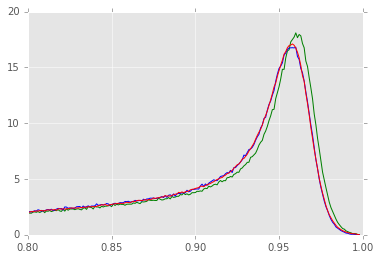

In [9]:
rv  = np.arange(0.8,1.0,0.001)

fig = plt.figure()
ax = fig.add_subplot(111)

mc_bins, _edges = np.histogram(Y, rv, normed = 1)
edges = _edges[:len(_edges)-1]
plt.plot(edges,mc_bins,"g")

mccorr_bins, _edges = np.histogram(YCORR, rv, normed = 1)
edges = _edges[:len(_edges)-1]
plt.plot(edges,mccorr_bins,"b")

data_bins, _edges = np.histogram(dfdata["R9"], rv, normed = 1)
edges = _edges[:len(_edges)-1]
plt.plot(edges  ,data_bins,"r")

# HERE I TRAIN ON THE CORRECTED DF

In [77]:
YCORR1 = dfmc["R9_corr"]-dfmc["R9"]
X = dfmc.loc[:,['Pt', 'ScEta', 'Phi', 'rho', 'R9']]
YCORR2 = dfmc["R9_corr"]/dfmc["R9"]
X = dfmc.loc[:,['Pt', 'ScEta', 'Phi', 'rho', 'R9']]

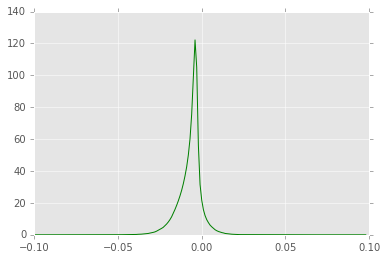

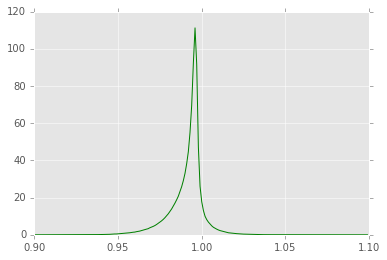

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

rv  = np.arange(-0.1,0.1,0.001)
mc_bins, _edges = np.histogram(YCORR1, rv, normed = 1)
edges = _edges[:len(_edges)-1]
plt.plot(edges,mc_bins,"g")

fig = plt.figure()
ax = fig.add_subplot(111)

rv  = np.arange(0.9,1.1,0.001)
mc_bins, _edges = np.histogram(YCORR2, rv, normed = 1)
edges = _edges[:len(_edges)-1]
plt.plot(edges,mc_bins,"g")

In [79]:
YCORR = dfmc["R9_corr"]-dfmc["R9"]
X = dfmc.loc[:,['Pt', 'ScEta', 'Phi', 'rho', 'R9']]

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(loss='ls',
                                n_estimators=100, max_depth=3,                                       
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

In [81]:
#print X

In [82]:
# print YCORR
# YY = YCORR - Y
# print YY

In [62]:
clf.fit(X,YCORR)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=9, min_samples_split=9,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [50]:
# XX = dfmc.loc[0:0,['Pt', 'ScEta', 'Phi', 'rho']]
# print XX
# YYPRED = clf.predict(XX)
# print YYPRED

In [63]:
YPRED = clf.predict(X)

In [64]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(YCORR, clf.predict(X))
# print("MSE: %.4f" % mse)

In [83]:
# print Y

In [53]:
# #print YPRED
# YY = YPRED - Y
# print YY
# print YPRED
# print YCORR

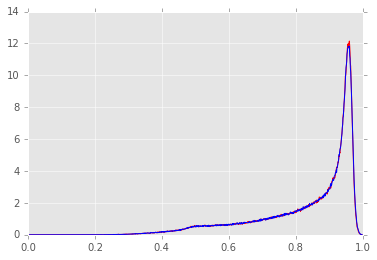

In [66]:
rv  = np.arange(0.0,1.0,0.001)

fig = plt.figure()
ax = fig.add_subplot(111)

mcpred_bins, _edges = np.histogram(YPRED+dfmc["R9"], rv, normed = 1)
edges = _edges[:len(_edges)-1]
plt.plot(edges  ,mcpred_bins,"r")

mccorr_bins, _edges = np.histogram(YCORR+dfmc["R9"], rv, normed = 1)
edges = _edges[:len(_edges)-1]
plt.plot(edges,mccorr_bins,"b")